Sprintの目的
スクラッチを通してSVMを理解する
線形モデルと異なる手法に触れる


2.SVMスクラッチ

分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。


以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。



【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 
λ
 を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。



$$
λ_{i}^{new}=λ_i+α(1−\sum_{i=1}^{m}λ_jy_iy_jk(x_i,x_j))
$$

ここで 
$$
k(x_i,x_j)
$$
 はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。

$$
k(x_i,x_j)=x_i^Tx_j
$$

条件として、更新毎に 
λi>=0
を満たす必要があります。満たさない場合は 
λi=0
とします。


i,j : サンプルのインデックス


$$
λ_{i}^{new}: 更新後のi番目のサンプルのラグランジュ乗数
$$

λi: 更新前のi番目のサンプルのラグランジュ乗数


α
 : 学習率


λ
j
 : j番目のサンプルのラグランジュ乗数


y
i
 : i番目のサンプルのラベル


y
j
 : j番目のサンプルのラベル


x
i
 : i番目のサンプルの特徴量ベクトル


x
j
 : j番目のサンプルの特徴量ベクトル


あるサンプルに対してのすべてのサンプルとの関係を計算していくことになります。




In [104]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    # def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
    def __init__(self, num_iter, lr, kernel, threshold, verbose):
        # ハイパーパラメータを属性として記録
        # print("num_iter")
        # print(num_iter)
        # print("kernel")
        # print(kernel)
        # print("threshold")
        # print(threshold)
        # print("verbose")
        # print(verbose)
        self.iter = num_iter 
        self.lr = lr 
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lamda = np.array([])  # 初期値
        self.lam_sv = np.array([])  # サポートベクターの保存する変数初期値
        self.X_sv = np.array([]) #サポートベクターのn番目のラベル初期値
        self.y_sv = np.array([]) #サポートベクターのn番目の特徴量初期値
        self.sv_pred = np.array([]) #推定値を保存する変数初期値

    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
                            
        self.lamda = np.zeros(X.shape[0]) #X.shape[1]：行列Xの列数を表す。np.zeros(X.shape[1])で、列数がX.shape[1]である０だけで構成される行列を作成している
        self.sv_pred = np.zeros(X.shape[0])
      

        # メイン処理
        # for k in range(self.iter):
        #   self.lamda = self._svm_gradient_descent(X,y)
        #   if(self.verbose ==True):# 問題2解答（サポートベクターの決定）
        #     mmm = np.where(self.lamda >= self.threshold)  #if(self.lamda>=10**-5):を元々書いたがこれだと処理できない
        #     self.lam_sv = np.append( self.lam_sv, self.lamda[mmm] )
        #     self.X_sv = np.append( self.X_sv, X[mmm] )
        #     self.y_sv = np.append( self.y_sv, y[mmm] )

        np.random.seed(0)
        self.lambda_ = np.random.rand(X.shape[0], 1) * 0.03
        
        for i in range(self.iter):
            self.lambda_=self._svm_gradient_descent(X, y)
        
        self.index_l = []
        for j, i in enumerate(self.lambda_):
            if i > self.threshold:
                self.index_l .append(j)
        self.lambda_sv = self.lambda_[self.index_l]
        self.X_sv = X[self.index_l]
        self.y_sv = y[self.index_l]



    

    #カーネル関数実装
    def _kernel2(self,X1,X2):
      """
      カーネル関数を計算する
      Parameters
      ----------
      X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
      Returns
      -------
        次の形のndarray, shape (n_samples, 1)
        カーネル関数による推定結果
      """
      kern = X1.T @ X2
      return kern
    
    # 問題１解答
    def _svm_gradient_descent(self, X, y):
        y = y.reshape(-1,1)
        """
        最急降下法によるパラメータの更新値計算
        適当な重みIrを掛けてλが小さくなる方へ徐々に転がっていくようにする
         X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
         y_true : 入力するモデルの学習に使用する正解値
        Returns
        -------
        λである。
        """
        m=X.shape[0] #n_samplesサンプル数
        # for i in range(m):
        for i in range(y.shape[0]):
          gradient = 0
          # for j in range(m):
          for j in range(len(y)):
            gradient += (self.lamda[j] * y[i] * y[j] * (X[i].T @ X[j]))
          self.lamda[i] +=  self.lr * (1-gradient)
          self.lambda_[self.lambda_ <= 0] = 0
        return self.lambda_
          # if(self.lamda[i]>=0):
          #   self.lamda = self.lamda
          # else:
          #   self.lamda = 0
          # return self.lamda
        


    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        self.y_pred = 0
        for n in range(self.lambda_sv.shape[0]):
          # self.y_pred += self.lam_sv[n]*self.y_sv[n]* (X.T[n] * self.X_sv[n])
          self.y_pred += self.lambda_sv[n]*self.y_sv[n]* (X @ self.X_sv[n].T)
          # self.y_pred += self.lambda_sv[i] * self.y_sv[i] * np.dot(X, self.X_sv[i].T)  
        self.y_pred = np.where(self.y_pred > 0, 1, -1)
        return self.y_pred

        # def predict(self, X):
        # self.y_pred = 0
        # for i in range(self.lambda_sv.shape[0]):
        #      self.y_pred += self.lambda_sv[i] * self.y_sv[i] * np.dot(X, self.X_sv[i].T)  
        # self.y_pred = np.where(self.y_pred > 0, 1, -1)       
        # return self.y_pred

    # def predict(self, X):
    #     self.y_pred = 0
    #     for i in range(self.lambda_sv.shape[0]):
    #          self.y_pred += self.lambda_sv[i] * self.y_sv[i] * np.dot(X, self.X_sv[i].T)  
    #     self.y_pred = np.where(self.y_pred > 0, 1, -1)       
    #     return self.y_pred


【問題2】サポートベクターの決定
計算したラグランジュ乗数 
λ
 が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。




In [105]:
#問題１に解答しました

【問題3】推定

推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた 

$$
k(x_i,x_j)=x_i^Tx_j
$$

f(x)
 の符号が分類結果です。

$$
f(x)=\sum_{n=1}^{N}λ_ny_{sv_n}k(x,s_n)
$$

x
 : 推定したいデータの特徴量ベクトル


N
 : サポートベクターの数


n
 : サポートベクターのインデックス


λ
n
 : 
n
番目のサポートベクターのラグランジュ乗数


$y_{sv_n}$ 
番目のサポートベクターのラベル


k
(
)
 : カーネル関数


s
n
 : 
n
番目のサポートベクターの特徴量




In [106]:
#問題１に解答しました

3.検証

【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。




In [107]:
#SVMのモデルで、シンプルデータセット１を使用して、学習と正答率を算出する
#シンプルデータセット1作成コード
#scikit-learnによる実装
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X1_1 = np.concatenate([f0, f1])
y1_1= np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])


#トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, y_train, y_test=train_test_split(X1_1, y1_1, train_size=0.8)
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
model = SVC(kernel='linear', random_state=None)

# モデルの学習。fit関数で行う。
model.fit(X_train, y_train)

from sklearn import linear_model, metrics, preprocessing #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
#正答率を求める
pre1=model.predict(X_test)
# print("予測値=",pre1)
ac_score1=metrics.accuracy_score(y_test,pre1)
# print("正答率 = ",ac_score1)


from sklearn.metrics import classification_report
import pandas as pd
import pprint


pre1=model.predict(X_test)
y_true_multi=y_test

y_pred_multi=pre1
print(classification_report(y_true_multi, y_pred_multi)) #引数に入れるのは、下記でサイトで調べた

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [108]:
#スクラッチSVM実装でシンプルデータセット１を使用して、学習と正答率を算出する

import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pprint
from sklearn import linear_model, metrics, preprocessing #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

#シンプルデータセット1作成コード
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X1_1 = np.concatenate([f0, f1])
y1_1= np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

# print("X1_1")
# print(X1_1.shape)
# print("y1_1")
# print(y1_1.shape)


#トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, y_train, y_test=train_test_split(X1_1, y1_1, train_size=0.8)



scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


model = ScratchSVMClassifier(num_iter=1000, lr=0.01, kernel='linear', threshold=1e-5, verbose=True)
# モデルの学習。fit関数で行う。
model.fit(X_train, y_train)

# sv_pre = self.predict(X)
# # print("sv_pre")
# # print(sv_pre)
# # print("self.lam_sv")
# # print(self.lam_sv)
# # print(self.lam_sv.shape)
# # print("self.y_sv")
# # print(self.y_sv)
# # print(self.y_sv.shape)
# # print("X")
# # print(X)
# # print(X.shape)
# # print("self.X_sv")
# # print(self.X_sv)
# # print(self.X_sv.shape)
# # print("sv_pre")
# # print(sv_pre)
# self.sv_pred = np.append( self.sv_pred, sv_pre ) #物凄く時間がかかった所。（空ののself.lossにnumpy ndarrayの要素を追加する方法）

#正答率を求める
# print("X_test")
# print(X_test.shape)

pre1=model.predict(X_test)
# print("予測値=",pre1)
# ac_score1=metrics.accuracy_score(y_test,pre1)
# print("正答率 = ",ac_score1)

y_true_multi=y_test
y_pred_multi=pre1
# print("y_true_multi")
# print(y_true_multi)
# print(y_true_multi.shape)
# print("y_pred_multi")
# print(y_pred_multi)
# print(y_pred_multi.shape)
print(classification_report(y_true_multi, y_pred_multi)) 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



【問題5】決定領域の可視化
決定領域を可視化してください。


以下の例のようにサポートベクターは異なる色で示してください。

In [109]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    if model==SV:
        plt.scatter(SV.X_sv[:, 0], SV.X_sv[:, 1], s=80, color='yellow', marker='o')
    else:
        plt.scatter(X_train[svc.support_, 0], X_train[svc.support_, 1], s=80, color='yellow', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

In [110]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [111]:
SV = ScratchSVMClassifier(num_iter=1000, lr=0.01, kernel='linear', threshold=1e-5, verbose=True)
SV.fit(X_train, y_train, X_test, y_test)
SV_pred = SV.predict(X_test)

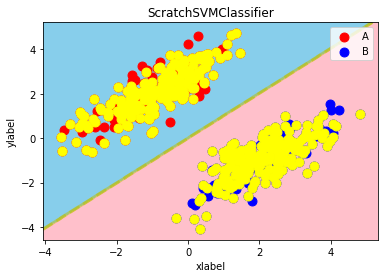

In [112]:
decision_region(X, y, SV, step=0.01, title='ScratchSVMClassifier', xlabel='xlabel', ylabel='ylabel', target_names=["A" ,'B'])